# Лабораторная работа №1. Методы сортировки.
# Выполнил студент группы БСТ2001 Ибодуллоев Умед Хуршедович

## Задание №1
1. Создать Jupyter Notebook со следующим наименованием: Lab1_Группа_ФИО
2. Создать новую ячейку с помощью кнопки
3. В созданной ячейке по указанной ниже форме заполните оглавление файла, заменив наименование группы и вписав свое ФИО, Рисунок 1 - Форма оглавления файла в ячейке после чего создайте еще одну ячейку и напишите следующий код:
4. С помощью кнопки запустите выполнение всех ячеек.
5. После выполнения у вас должна отформатироваться ячейка с оглавлением и должен выполниться "Hello, World!"

In [1]:
print("Hello, World!")

Hello, World!


## Задание №2
Написать генератор случайных матриц(многомерных), который принимает опциональные параметры m, n, min_limit, max_limit, где m и n указывают размер матрицы, а min_lim и max_lim - минимальное и максимальное значение для генерируемого числа . По умолчанию при отсутствии параметров принимать следующие значения:

m = 50;

n = 50;

min_limit = -250;

max_limit = 1000 + 7;


In [17]:
import random  
def createArray():
    m = 50
    n = 50
    min_limit = -250
    max_limit = 1007
    return [ [random.randint(min_limit, max_limit) for i in range(m)] for j in range(n)]
 
print(creatArray())

[[231, 382, -183, 231, 572, 835, 594, 320, 671, 192, 779, 5, -58, 650, -182, 468, 694, 357, 53, 142, 552, 664, 270, 13, -211, -250, 315, 746, 465, -244, -157, 416, 685, -27, 842, -30, 667, 958, 442, 740, -106, 974, 81, -173, 992, -124, -215, 323, 25, 863], [295, 646, 131, 356, 850, 960, -80, -216, 114, 502, 870, 474, 663, 621, 188, 718, 212, -129, 77, 176, 933, 993, -25, 339, 226, 89, 631, 432, 789, 258, 986, 512, 524, -166, 994, 210, 520, 153, 331, 326, 898, 953, -208, -53, 425, -226, 141, 667, -132, 24], [629, 877, 836, 693, 400, -18, -68, 371, 830, 375, 220, 32, 535, 626, -221, -202, 323, 409, -104, 322, 843, 28, 993, -203, 598, -49, 754, 748, -33, -191, -134, 519, 761, 412, 619, 384, -143, 233, -113, -201, 457, -222, 191, -241, 898, 865, 386, 670, -152, 248], [-144, 781, -42, 455, -151, 371, -126, -11, 973, 134, 930, -76, 567, 661, 798, -6, 896, -231, 348, -78, 997, 882, 943, 900, 755, 293, -219, 1003, 986, -146, 707, 730, -149, 148, 585, -218, -86, 504, 217, 660, 586, 331, 325, 86

## Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со временем стандартной функции сортировки. Испытания проводить на сгенерированных матрицах.

Методы:

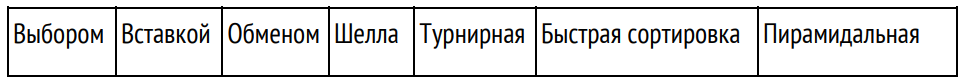

In [18]:
# Сортировка выбором
def selection_sort(arr):
    for i, e in enumerate(arr):
        mn = min(range(i, len(arr)), key = arr.__getitem__)
        arr[i], arr[mn] = arr[mn], e
    return arr

In [19]:
# Сортировка вставкой
def insertion_sort(arr):
    for i in range(1, len(arr)):
        j = i - i
        while j >= 0 and arr[i] < arr[j]: 
            arr[j + 1] = arr[j]
            j = j - 1
        arr[j + 1] = arr[i]

In [20]:
# Сортировка обменом
def bubble_sort(arr):
    for i in range(len(arr)):
        for j in range(0, len(arr)-i-1): 
            if arr[j] > arr[j+1] : 
                arr[j], arr[j+1] = arr[j+1], arr[j]

In [21]:
# Сортировка Шелла
def shell_sort(arr):
    last_index = len(arr) - 1
    step = len(arr) // 2
    while step > 0:
        for i in range(step, last_index + 1, 1):
            j = i
            delta = j - step
            while delta >= 0 and arr[delta] > arr[j]:
                arr[delta], arr[j] = arr[j], arr[delta]
                j = delta
                delta = j - step
        step //= 2

In [22]:
# Турнирная сортировка
def tournir_sort(arr):
    tree = [None] * 2 * (len(arr) + len(arr) % 2)
    index = len(tree) - len(arr) - len(arr) % 2
    for i, v in enumerate(arr):
        tree[index + i] = (i, v)
    for j in range(len(arr)):
        n = len(arr)
        index = len(tree) - len(arr) - len(arr) % 2
        while index > -1:
            n = (n + 1) // 2
            for i in range(n):
                i = max(index + i * 2, 1) # на последней итерация index + i * 2 = 0
                if tree[i] != None and tree[i + 1] != None:
                    if tree[i][1] < tree[i + 1][1]:
                        tree[i // 2] = tree[i]
                    else:
                        tree[i // 2] = tree[i + 1]
                else:
                    tree[i // 2] = tree[i] if tree[i] != None else tree[i + 1]
            index -= n

        index, x = tree[0]
        arr[j] = x
        tree[len(tree) - len(arr) - len(arr) % 2 + index] = None

In [23]:
# Быстрая сортировка
def quick_sort(arr, first=0, last=None):
    if last == None:
        last = len(arr) - 1    
    if first >= last:
        return
    i, j = first, last
    pivot = arr[(last + first) // 2]
 
    while i <= j:
        while arr[i] < pivot: i += 1
        while arr[j] > pivot: j -= 1
        if i <= j:
            arr[i], arr[j] = arr[j], arr[i]
            i, j = i + 1, j - 1
            
    quick_sort(arr, first, j)
    quick_sort(arr, i, last)

In [24]:
# Пирамидальная сортировка
def heapkycha(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[i] < arr[left]:
        largest = left

    if right < n and arr[largest] < arr[right]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]

        heapkycha(arr, n, largest)

def heapsort(arr):
    n = len(arr)

    for i in range(n, -1, -1):
        heapkycha(arr, n, i)

    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i] 
        heapkycha(arr, i, 0)

In [25]:
import random
import time

SORT_FUNCTIONS = {
    'Сортировка выбором': selection_sort,
    'Сортировка вставкой': insertion_sort,
    'Сортировка обменом': bubble_sort,
    'Cортировка Шелла': shell_sort,
    'Быстрая сортировка': quick_sort,
    'Турнирная сортировка': tournir_sort,
    'Пирамидальная сортировка': heapsort,
    'Встроенная сортировка': sorted
}

def comparison(comparison):
    largest_name_len = len(max(comparison.keys(), key=len))
    largest_name_len += 6

    heading = 'Алгоритм'.ljust(largest_name_len) + 'Время'
    print(heading)
    # print('-' * len(heading))
    for algo, time_taken in comparison.items():
        print(f'{algo:<{largest_name_len}}{time_taken}')

time_taken = {}
samples = creatArray()
for algo_name, sorter in SORT_FUNCTIONS.items():
    samples_copy = samples.copy()
    start = time.perf_counter()
    for sample in samples_copy:
        sorter(sample)
    end = time.perf_counter()

    time_taken[algo_name] = (end - start) / len(samples)

time_taken_sorted = dict(sorted(time_taken.items(), key=lambda kv: kv[1]))
comparison(time_taken_sorted)

Алгоритм                      Время
Встроенная сортирока          2.0000000040454322e-06
Сортировка вставкой           1.6000000000531147e-05
Cортировка Шелла              4.400000000259752e-05
Быстрая сортировка            5.599999999958527e-05
Сортировка выбором            0.0001559999799974321
Сортировка обменом            0.0002320000000008804
Пирамидальная сортировка      0.00024199999999837017
Турнирная сортировка          0.0029979999999977737


## Задание №4
Создать публичный репозиторий на github, и запушить выполненное задание в .ipynb формате.
https://github.com/1Double/MTUCI/tree/main/Term_4/SAOD/Lab1